### facenet을 이용한 face embedding 표현

[(98, 758, 284, 572)]


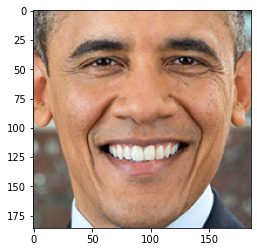

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/obama.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
import face_recognition
import os

def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

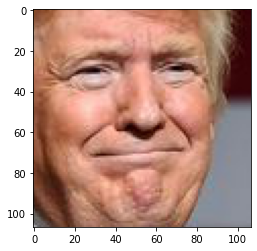

In [3]:
image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/trump.jpg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

In [4]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

file_list: ['trump.jpg', 'biden.jpg', 'clinton.jpeg', 'bush.jpeg', 'obama.jpg']


In [5]:
image_file = os.path.join(dir_path, 'obama.jpg')
face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
len(embedding[0])

128

In [6]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = dict()
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        plt.imshow(face)
        plt.xlabel('{}'.format(os.path.splitext(file)[0]))
        plt.show()
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

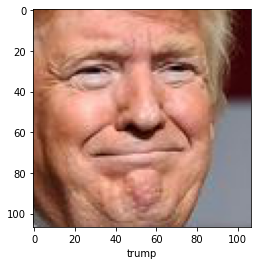

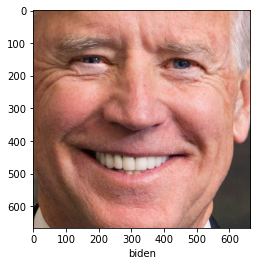

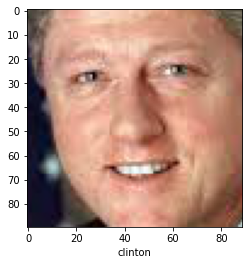

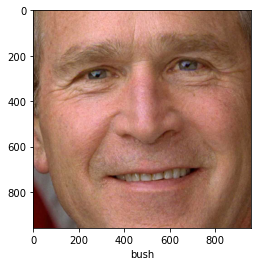

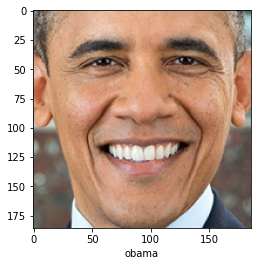

array([-0.15962465,  0.20268647,  0.03236355,  0.02439232, -0.06226425,
        0.05140707,  0.07351796, -0.16823342,  0.06962211, -0.05557973,
        0.17270111, -0.05094169, -0.35293114, -0.03164377,  0.03792978,
        0.17343849, -0.13260116, -0.15357369, -0.23523535, -0.08442691,
       -0.00134134,  0.03210671, -0.08926146, -0.02670788, -0.09581176,
       -0.25792357, -0.01057011, -0.11071663,  0.03133569, -0.0744493 ,
        0.05670559, -0.02273794, -0.1946113 , -0.04576055,  0.00947584,
        0.0180606 , -0.1502624 , -0.07787322,  0.17577605,  0.01933263,
       -0.19744577, -0.03930516,  0.07374471,  0.20196033,  0.14767548,
       -0.01415385,  0.01724758, -0.11976209,  0.09462966, -0.2431815 ,
       -0.02755119,  0.12169888,  0.14837697,  0.17079777,  0.06952561,
       -0.1536046 ,  0.02005425,  0.08199164, -0.19544829,  0.10653655,
        0.11468481, -0.21902834, -0.07677586, -0.0679104 ,  0.10587615,
        0.05921575, -0.06115706, -0.11171095,  0.23917493, -0.15

In [7]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['trump']

### 임베딩 벡터간 거리

In [8]:
import numpy as np

x = np.array([1,2,3,4,5])
y = np.array([2,3,4,5,6])

print(np.linalg.norm(y-x, ord=1))  #L1 distance
print(np.linalg.norm(y-x, ord=2))  #L2 distance

5.0
2.23606797749979


In [9]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('obama', 'trump')

0.888511663183844

In [10]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')   
# 이렇게 생성된 함수 sort_key_func는 sort_key_func('obama') 라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [11]:
sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

[('trump',
  array([-0.15962465,  0.20268647,  0.03236355,  0.02439232, -0.06226425,
          0.05140707,  0.07351796, -0.16823342,  0.06962211, -0.05557973,
          0.17270111, -0.05094169, -0.35293114, -0.03164377,  0.03792978,
          0.17343849, -0.13260116, -0.15357369, -0.23523535, -0.08442691,
         -0.00134134,  0.03210671, -0.08926146, -0.02670788, -0.09581176,
         -0.25792357, -0.01057011, -0.11071663,  0.03133569, -0.0744493 ,
          0.05670559, -0.02273794, -0.1946113 , -0.04576055,  0.00947584,
          0.0180606 , -0.1502624 , -0.07787322,  0.17577605,  0.01933263,
         -0.19744577, -0.03930516,  0.07374471,  0.20196033,  0.14767548,
         -0.01415385,  0.01724758, -0.11976209,  0.09462966, -0.2431815 ,
         -0.02755119,  0.12169888,  0.14837697,  0.17079777,  0.06952561,
         -0.1536046 ,  0.02005425,  0.08199164, -0.19544829,  0.10653655,
          0.11468481, -0.21902834, -0.07677586, -0.0679104 ,  0.10587615,
          0.05921575, -0.06

In [12]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i in range(top):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

In [13]:
# obama와 가장 닮은 사람은 누굴까요?
get_nearest_face('obama')

순위 1 : 이름(biden), 거리(0.8467205161894237)
순위 2 : 이름(bush), 거리(0.8628473776922667)
순위 3 : 이름(trump), 거리(0.888511663183844)
순위 4 : 이름(clinton), 거리(0.9000996972190597)


## 닮은 연예인 찾기

In [14]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/Celeb'

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = dict()
    image_dict = dict()
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        print(img_path)
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
                    # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
            image_dict[os.path.splitext(file)[0]] = face
        
    return embedding_dict,image_dict

embedding_dict,image_dict = get_face_embedding_dict(dir_path)

/home/aiffel0042/aiffel/face_embedding/Celeb/limario.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/psy.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/minyong.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/kimgoeun.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/leesechang.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/leesedol.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/leesuji.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/me.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/idol.jpg
/home/aiffel0042/aiffel/face_embedding/Celeb/songjungeun.jpg


In [15]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    for i in range(top+1):
        if i == 0 :   
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces[1][0]

In [16]:
print(embedding_dict.keys())

dict_keys(['limario', 'psy', 'minyong', 'kimgoeun', 'leesechang', 'leesedol', 'leesuji', 'me', 'idol', 'songjungeun'])


In [17]:
matched=[]

for k in embedding_dict.keys():
    print(k)
    most_key = get_nearest_face(k)
    matched.append([k,most_key])

limario
순위 1 : 이름(kimgoeun), 거리(0.5094356526992019)
순위 2 : 이름(psy), 거리(0.5303161534368428)
순위 3 : 이름(songjungeun), 거리(0.5408690002605502)
순위 4 : 이름(leesechang), 거리(0.5619324746671125)
순위 5 : 이름(leesuji), 거리(0.5632571620175394)
psy
순위 1 : 이름(leesuji), 거리(0.42542375742929467)
순위 2 : 이름(kimgoeun), 거리(0.44072889999991177)
순위 3 : 이름(me), 거리(0.45466479031698803)
순위 4 : 이름(limario), 거리(0.5303161534368428)
순위 5 : 이름(idol), 거리(0.5528029702628501)
minyong
순위 1 : 이름(me), 거리(0.4017312503843583)
순위 2 : 이름(leesedol), 거리(0.47540357933535116)
순위 3 : 이름(idol), 거리(0.517833154442747)
순위 4 : 이름(leesuji), 거리(0.5194751383362984)
순위 5 : 이름(psy), 거리(0.5665831845890003)
kimgoeun
순위 1 : 이름(leesuji), 거리(0.35303839359804473)
순위 2 : 이름(idol), 거리(0.41603579165960347)
순위 3 : 이름(psy), 거리(0.44072889999991177)
순위 4 : 이름(me), 거리(0.5050432975851202)
순위 5 : 이름(limario), 거리(0.5094356526992019)
leesechang
순위 1 : 이름(limario), 거리(0.5619324746671125)
순위 2 : 이름(songjungeun), 거리(0.6486021011159385)
순위 3 : 이름(psy), 거리(0.684243438

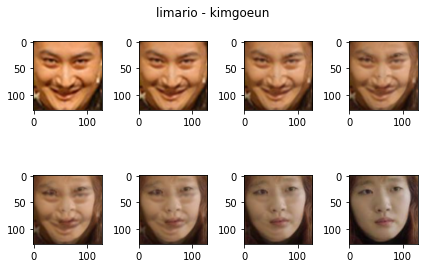

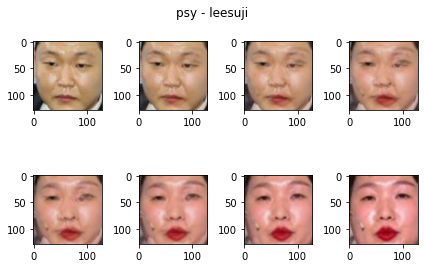

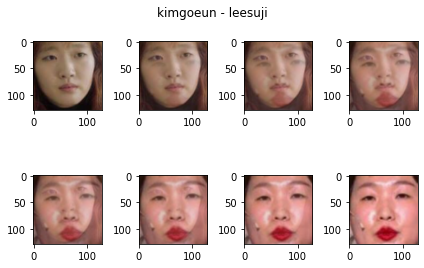

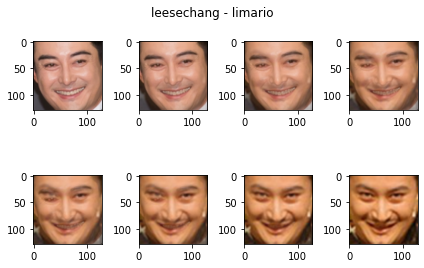

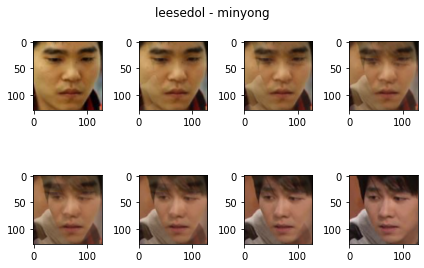

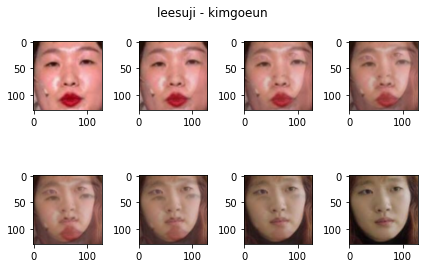

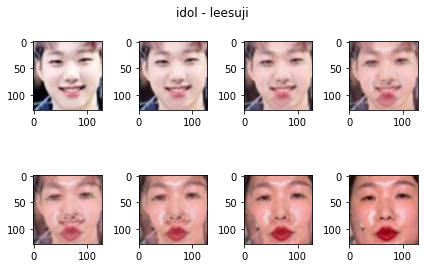

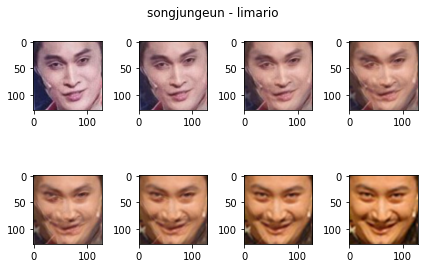

In [18]:
import cv2
w,h = (128,128)
alpha = 1
leng = 7
step = alpha/leng

for k1,k2 in matched:
    if k1=='me' or k2=='me': continue
    img1 = np.uint8(cv2.resize(image_dict[k1],(w,h)))
    img2 = np.uint8(cv2.resize(image_dict[k2],(w,h)))
    alpha = 1
    fig = plt.figure()
    plt.suptitle('{} - {}'.format(k1,k2))
    for i in range(leng+1):
        n_img = np.uint8(img1*alpha + img2*(1-alpha))
        plt.subplot(241+i)
        plt.imshow(n_img)
        alpha-=step
    fig.tight_layout()
    plt.show()

##### image를 그릴때 내 얼굴은 plot을 안했는데 다르게 찍어도 자꾸 최민용이 나온다. 세상에
##### 나머지 연예인들은 서로 닮기로 유명한 사람들 넣었다.